# Real Estate Price Prediction

Link to the dataset - https://www.kaggle.com/datasets/shantanudhakadd/house-prediction-dataset

This dataset is about Bangalore houses

Columns:

Area_type,
Availability,
Location,
Size,
Society,
Total_sqft,
Bath,
Balcony,
Price.

Prediction - Price ( Dependent Variable ), We are using Supervised Learning since we have all the Independent variables to find output which is Depedent variable

In [129]:
import pandas as pd
import seaborn as sns
import numpy as np

In [130]:
data = pd.read_csv("C:/Users/SABAREESH/Downloads/archive (4)/Bengaluru_House_Data.csv")
data.shape

(13320, 9)

In [131]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [132]:
data.groupby(["area_type"])["area_type"].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Data Cleaning and Data Transformation

We have dropped Area_type, Availablity, Society columns becuase it is not that important and does not affect output that much and also filling and dropping missing values

In [133]:
data = data.drop(["area_type","availability","society"],axis="columns")

In [134]:
data.isnull().any()

location       True
size           True
total_sqft    False
bath           True
balcony        True
price         False
dtype: bool

In [135]:
import math

a = math.floor(data['bath'].mean())
a = math.floor(data['balcony'].mean())

In [136]:
data["bath"].fillna(value=a,inplace=True)
data["balcony"].fillna(value=a,inplace=True)

In [137]:
data = data.dropna()

In [138]:
data.shape

(13303, 6)

In [139]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [140]:
data['BHK'] = data["size"].apply(lambda x: int(x.split(" ")[0]))

In [141]:
data = data.drop(["size"],axis="columns")

In [142]:
data.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [143]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [144]:
import numpy as np
import re

def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        value = re.sub(r'[^\d.]+', '', value)  # Remove non-numeric characters
        value = re.sub(r'\.(?=.*\.)', '', value)  # Replace multiple consecutive decimal points with a single decimal point
        return float(value)

data['sqrt'] = data['total_sqft'].apply(lambda x: np.mean([convert_to_float(val) for val in x.split('-')]))


In [145]:
data = data.drop("total_sqft",axis="columns")

In [146]:
data['bath'] = data['bath'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['sqrt'] = data['sqrt'].astype(int)
data['price'] = data['price'].astype(int)

In [147]:
data["price_by_sqrt"] = data["price"]*100000/data["sqrt"]

In [148]:
data['location'] = data["location"].apply(lambda x: x.strip())

l = data.groupby("location")["location"].count().sort_values(ascending=False)
l

l_l = l[l<=10]
l_l

data["location"] = data['location'].apply(lambda x: 'other' if x in l_l else x)

In [149]:
len(data.location.unique())

242

In [150]:
data[data.sqrt/data.BHK < 300].head()

,location,bath,balcony,price,BHK,sqrt,price_by_sqrt
9,other,6,1,370,6,1020,36274.509804
45,HSR Layout,9,1,200,8,600,33333.333333
58,Murugeshpalya,4,1,150,6,1407,10660.980810
68,Devarachikkanahalli,7,0,85,8,1350,6296.296296
70,other,3,2,100,3,500,20000.000000


In [151]:
data = data[~(data.sqrt/data.BHK < 300)]

In [152]:
data.shape

(12533, 7)

In [153]:
data.price_by_sqrt.describe()
data.shape

(12533, 7)

# Outlier Dectection and Removel

In [159]:
def outlier_removel(df):
    
    output = pd.DataFrame()

    
    for a,b in df.groupby("location"):
        mean = np.mean(b.price_by_sqrt)
        std = np.std(b.price_by_sqrt)
        reduced_data = b[(b.price_by_sqrt>(mean-std)) & (b.price_by_sqrt<=(mean+std))]
        output = pd.concat([output,reduced_data],ignore_index=True)
        

        
        
        
    return output

In [160]:
def outlier_removel2(df):
    exclude_index = np.array([])
    for a,b in df.groupby("location"):
        
        bhk_stats = {}
        
        for bhk,bhk_df in b.groupby("BHK"):
            bhk_stats[bhk] = {
                
                "Mean" : np.mean(bhk_df.price_by_sqrt),
                "Std" : np.std(bhk_df.price_by_sqrt),
                "count" : bhk_df.shape[0]
            }
            
        for bhk,bhk_df in b.groupby("BHK"):
            stats = bhk_df.get(bhk-1)
            if stats and stats["count"] > 5:
                exclude_index = np.append(exclude_index,bhk_df[bhk_df.price_by_sqrt<(stats['Mean'])].index.values)
        
        
        
    return df.drop(exclude_index,axis='index')

In [161]:
data = outlier_removel(data)
data = outlier_removel2(data)

In [162]:
data = data[data.bath<data.BHK+2]
data.shape

(6943, 7)

<AxesSubplot:xlabel='BHK', ylabel='Count'>

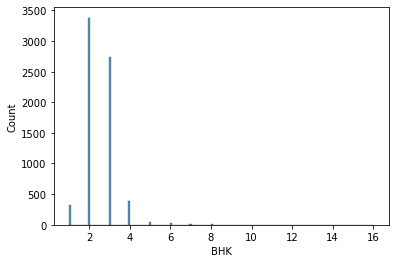

In [163]:
sns.histplot(x=data.BHK)

# Regression Model to predict the price 

In [164]:
dummies = pd.get_dummies(data.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [165]:
data = pd.concat([data,dummies],axis="columns")

In [166]:
data = data.drop(["location"],axis="columns")
data

,bath,balcony,price,BHK,sqrt,price_by_sqrt,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,3,2,194,3,1630,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3,235,3,1875,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,148,2,1235,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,3,250,4,2825,8849.557522,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,167,3,1875,8906.666667,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6938,2,1,57,2,1095,5205.479452,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6939,2,1,65,2,1256,5175.159236,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6940,2,2,110,2,1353,8130.081301,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6941,2,2,63,3,1440,4375.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [167]:
data = data.drop(["price_by_sqrt"],axis="columns")


In [287]:
x = data.drop(['price','balcony'],axis="columns")
y = data.price


In [288]:
x

,bath,BHK,sqrt,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,3,3,1630,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1875,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1235,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,2825,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,3,1875,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6938,2,2,1095,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6939,2,2,1256,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6940,2,2,1353,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6941,2,3,1440,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [289]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [290]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [291]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
lr.score(x_test,y_test)

0.9290092346506281

In [292]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.predict(x_test)
rfr.score(x_test,y_test)

0.9167864234087448

In [293]:
location = "1st Block Jayanagar"

loc = np.where(x.columns==location)
loc[0][0]

3

In [294]:
x

,bath,BHK,sqrt,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,3,3,1630,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1875,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1235,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,2825,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,3,1875,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6938,2,2,1095,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6939,2,2,1256,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6940,2,2,1353,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6941,2,3,1440,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [310]:
def predict_price(location,sqrt,bath,bhk):
    loc = np.where(data.columns==location)[0][0]
    
    X = np.zeros(len(x.columns))
    X[0] = bath
    X[1] = bhk
    X[2] = sqrt
    if X[loc] >=0:
        X[loc] = 1
    
    return rfr.predict([X])[0]

In [311]:
predict_price("1st Phase JP Nagar",2825,4,4)

C:\Users\SABAREESH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


158.75

In [301]:
y

0       194
1       235
2       148
3       250
4       167
       ... 
6938     57
6939     65
6940    110
6941     63
6942     48
Name: price, Length: 6943, dtype: int32

In [302]:
import pickle

with open("Real_Estate_Price_Prediction_Model.pickle",'wb') as f:
    pickle.dump(rfr,f)

In [303]:
import json

columns = {
    "Data_Columns" : [col.lower() for col in x.columns]
}

with open("Columns.json","w") as f:
    f.write(json.dumps(columns))

In [304]:
columns

{'Data_Columns': ['bath',
  'bhk',
  'sqrt',
  '1st block jayanagar',
  '1st phase jp nagar',
  '2nd phase judicial layout',
  '2nd stage nagarbhavi',
  '5th block hbr layout',
  '5th phase jp nagar',
  '6th phase jp nagar',
  '7th phase jp nagar',
  '8th phase jp nagar',
  '9th phase jp nagar',
  'aecs layout',
  'abbigere',
  'akshaya nagar',
  'ambalipura',
  'ambedkar nagar',
  'amruthahalli',
  'anandapura',
  'ananth nagar',
  'anekal',
  'anjanapura',
  'ardendale',
  'arekere',
  'attibele',
  'beml layout',
  'btm 2nd stage',
  'btm layout',
  'babusapalaya',
  'badavala nagar',
  'balagere',
  'banashankari',
  'banashankari stage ii',
  'banashankari stage iii',
  'banashankari stage v',
  'banashankari stage vi',
  'banaswadi',
  'banjara layout',
  'bannerghatta',
  'bannerghatta road',
  'basavangudi',
  'basaveshwara nagar',
  'battarahalli',
  'begur',
  'begur road',
  'bellandur',
  'benson town',
  'bharathi nagar',
  'bhoganhalli',
  'billekahalli',
  'binny pete',
